Produce an animated line graph of accelerometer data

In [48]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
import pandas as pd
from datetime import date

Load Dataset and check datatypes

Dataset was downloaded from Looker on Dec 8.  Select csv, unformatted and all data in Option pop-up

In [49]:
df = pd.read_csv("AnimateActivity_2023-12-09T1604.csv")
##  Shorten col names
df.rename(columns = {'Activity Totals Data Participant ID':'ID'}, inplace = True)
df.rename(columns = {'Activity Totals Data Entry Date':'Date'}, inplace = True)
df.rename(columns = {'Activity Totals Data Avg Normalized La':'LaNorm1'}, inplace = True)
df.rename(columns = {'Activity Totals Data Avg Normalized Rw':'RwNorm1'}, inplace = True)
print(df.tail(4))
df= df.sort_values(by=['ID'], ascending=True)
df = df[['ID', 'Date', 'LaNorm1','RwNorm1']]
df['Date'] =pd.to_datetime(df['Date'])  ## convert date object to datetime
print(df.dtypes) ## Show data types

        ID        Date     LaNorm1     RwNorm1
7845  47.0  2014-10-02  518.124931  605.675434
7846  55.0  2014-09-25  349.975236   45.553161
7847  54.0  2014-09-19  383.303420  446.997465
7848   NaN         NaN         NaN         NaN
ID                float64
Date       datetime64[ns]
LaNorm1           float64
RwNorm1           float64
dtype: object


Get stats

In [50]:
df.describe()

,ID,LaNorm1,RwNorm1
count,7848.000000,7740.000000,7729.000000
mean,650.804154,535.945034,497.344511
std,497.981892,363.885012,245.617318
min,47.000000,0.000000,0.000000
25%,259.000000,251.783805,332.557687
50%,489.000000,468.759092,523.864639
75%,1032.000000,768.309222,679.296462
max,2056.000000,2509.763920,1081.418856


Check if CODEC can be found

In [51]:
matplotlib.animation.FFMpegWriter().isAvailable()

True

Create animated graph

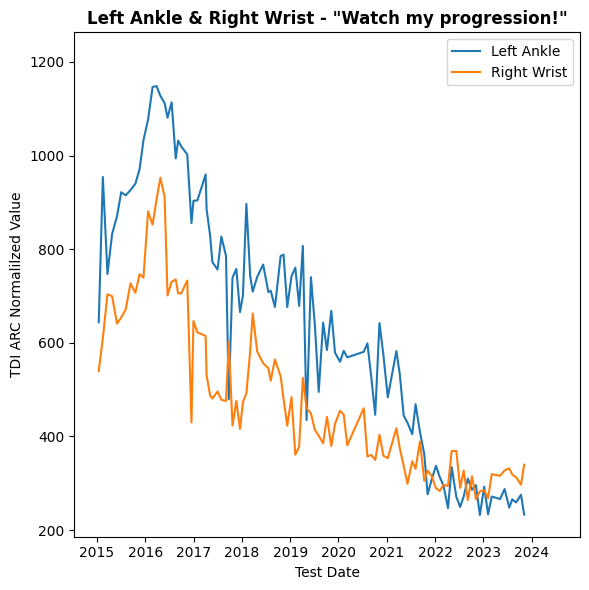

In [55]:
# Select one participant (ID = 65) and sort df by date 
df65= df.loc[df['ID'] == 65].sort_values(by=['Date'], ascending=True)

x = df65['Date']
y = df65['LaNorm1']
z = df65['RwNorm1']

fig, ax = plt.subplots(1, 1, figsize = (6, 6))

right = date(2024,12,31)  #TODO find code to use x[0] or min x 
left = date(2014, 7, 15)

def animate(i):
    ax.cla() # clear the previous image
    ax.plot(x[:i], y[:i]) # plot y
    ax.plot(x[:i], z[:i]) # plot z
    ax.set_xlim(left,right)
    ax.set_ylim([0.8*np.min(y), 1.1*np.max(y)])
    ax.title.set_text('Left Ankle & Right Wrist - "Watch my progression!"')
    ax.title.set_weight('bold')
    ax.legend(["Left Ankle", "Right Wrist"], loc ="upper right")
    ax.set_xlabel('Test Date')
    ax.set_ylabel('TDI ARC Normalilzed Value')

anim = animation.FuncAnimation(fig, animate, frames = len(x) + 1, interval = 1, blit = False)
# FFwriter = matplotlib.animation.FFMpegWriter()

anim.save('LaRwProgression.mp4',
          dpi=150,
          fps=30,
          writer='ffmpeg')
plt.tight_layout()
 
plt.show()

3D example

MovieWriter imagemagick unavailable; using Pillow instead.


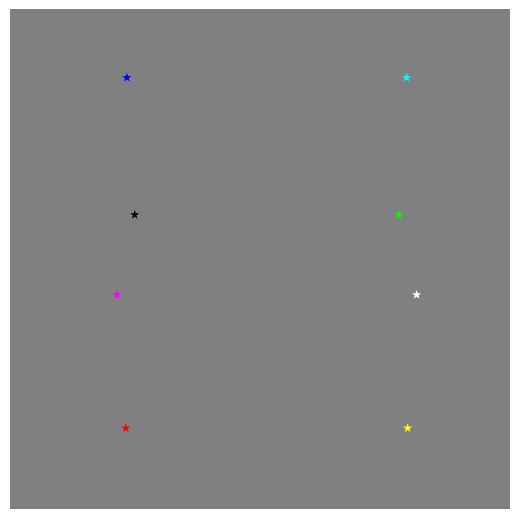

In [54]:
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
fig.subplots_adjust(left=0, bottom=0, right=1, top=1)
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor((0.5, 0.5, 0.5))

gradient = np.linspace(0, 1, 2)
X,Y,Z = np.meshgrid(gradient, gradient, gradient)
colors=np.stack((X.flatten(),Y.flatten(),Z.flatten()),axis=1)
ax.scatter(X,Y,Z,alpha=1.0,s=50,c=colors,marker='*',linewidth=0)
plt.axis('off')
fig.set_size_inches(5, 5)

def update(i, fig, ax):
    ax.view_init(elev=50., azim=i)
    return fig, ax
 
anim = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), repeat=True, fargs=(fig, ax))
anim.save('rgb_cube.gif', dpi=80, writer='imagemagick', fps=24)